# Initial Conditions
## Data

In [35]:
m = 42.0; k = 32000.0; z = 0.02
x0 = 200/1000; v0 = -800/1000
P = 700; a = 1.3

## Particular Integral
The loading and the assumed particular integral, as well its derivatives
$$p(t) = P_0 \, \exp(-a t),$$
$$\xi(t)=C\exp(-a t),\quad\dot\xi=-aC\exp(-a t),\quad\ddot\xi=a^2C\exp(-a t).$$
Substituting $\xi$ into the EoM we can simplify and solve for $C$:
\begin{align*}
  C(k-ac+^2m)\exp(-a t) = P \exp(-at)\ \rightarrow\ C=\frac{P}{k-ac+a^2m}.
\end{align*}

In [36]:
c = 2*z*np.sqrt(k*m)
C = P/(k-a*c+a*a*m)

In [37]:
display(Math('C=%.2f\\,\\text{mm}'%(C*1000)))

<IPython.core.display.Math object>

## General Integral

$$x = \exp(-\zeta\omega_nt) (A\cos(\omega_Dt)+B\sin(\omega_Dt)) + C\exp(-a t),$$$$
  x(0) = A+C, \quad \dot x(0)= \omega_DB-\zeta\omega_nA-aC.$$

In [63]:
wn2 = k/m
wn = np.sqrt(wn2)
wd = wn*np.sqrt(1-z*z)
# A+C=x0; wd B - z wn A -a C = v0
A = x0-C; B = (v0 + a*C + z*wn*A)/wd

In [44]:
expw = f'\\exp(-{(z*wn):.3f}\\,t)' ; expa = f'\\exp(-{a:.3f}\\,t)'
cosd = f'\\cos({wd:.3f}\\,t)' ; sind = f'\\sin({wd:.3f}\\,t)'
lp = '\\big(' ; rp = '\\big)'
def f(v): return f'{v:+.4f}'
display(Latex(r'\begin{align*}x(t) &=' + 
             expw+lp+f(A)+cosd+f(B)+sind+rp+f(A)+expa+r'\\' +
             r'\dot x(t) &=' + 
             expw+lp+f(B*wd-z*wn*A)+cosd+f(-A*wd-z*wn*B)+sind+rp + 
             f(-a*A)+expa + r'\end{align*}'))

<IPython.core.display.Latex object>

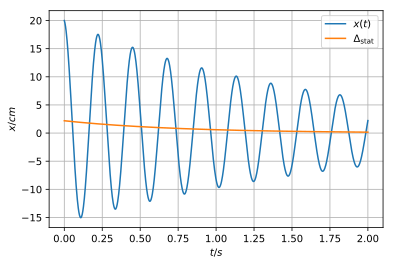

In [45]:
t = np.linspace(0,2,1001)
def x(t): return np.exp(-z*wn*t)*(A*np.cos(wd*t)+B*np.sin(wd*t))+C*np.exp(-a*t)
plt.plot(t,100*x(t), label='$x(t)$')
plt.plot(t,100*P*np.exp(-a*t)/k, label='$\Delta_\\mathrm{stat}$')
plt.grid()
plt.legend()
plt.xlabel('$t/s$')
plt.ylabel('$x/cm$')
None

# Rayleigh Quotient

We need some symbols (`sp` is an alias for the `sympy` module, aka library, that provides symbolic math to Python)

In [24]:
L, k, mu0, eta, x0, x1, omega = sp.symbols('L k mu_0 eta x_0 x_1 omega')

We write an expression for $\mu(\eta)$ and we integrate it to compute the total mass, $m=\int_0^L\mu(x)\,dx=\mu_0 L \int_0^1\mu(\eta)\,d\eta$

In [25]:
mu = 2-eta
mass = sp.integrate(mu,(eta, 0, 1))

In [26]:
display(Math('m='+sp.latex(mass)+r'\,\mu_0L'))

<IPython.core.display.Math object>

We write the expression for $V_\mathrm{max}$ (that's easy) and the one for $T_\mathrm{max}$, here we start computing the integral
$\int_0^L\mu(x)v^2(x)\,dx=L\int_0^1\mu(\eta)(x_0+(x_1-x_0)\eta)^2\,d\eta$ to finally adjust our expression collecting terms and multiplying by $\omega^2$

In [27]:
V = (2*x0**2+3*x1**2)*k/2
temp = sp.integrate(mu*(x0+eta*(x1-x0))**2,(eta,0,1)).expand()*L
T = omega**2*sp.collect(temp,mu0)/2

In [28]:
display(Math('T_\mathrm{max}=V_\mathrm{max}\Rightarrow'+sp.latex(sp.Eq(T,V))))

<IPython.core.display.Math object>

Solving the previous equation we have $\omega^2=\omega^2(x_0, x_1)$, 

In [29]:
w2 = sp.solve(sp.Eq(T,V),omega)[1]**2

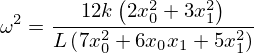

In [30]:
display(sp.Eq(omega**2,w2))

Our next step is to remove all dependencies except $x_1$ and finally plot our function of the single variable $x_1$

<IPython.core.display.Math object>

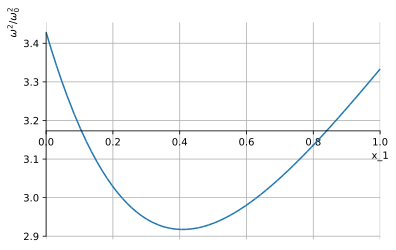

In [31]:
vals = {k:1, mu0:1, L:1, x0:1}
display(Math(r'\left.\frac{\omega^2}{\omega_0^2}\right|_{x_0=1} = '+sp.latex(w2.subs(vals))))

with rc_context(rc={'axes.grid':True}):
    plot = sp.plot(w2.subs(vals), (x1, 0,1), show=0)
    plot.ylabel = r'$\omega^2/\omega_0^2$'
    plot.show()

It's apparent that the minimum is near the point $x_1=0.4$ but also $x_1=0.5$ should give us a very good approximation...

In [32]:
w_1_2  = w2.subs(vals).subs(x1,sp.Rational(1,2))
w_4_10 = w2.subs(vals).subs(x1,sp.Rational(4,10))
display(Math(r'\omega^2='+sp.latex(w_1_2)+'\\frac{k}{\\mu_0L}'+
             '=%.6f\\frac{k}{\\mu_0L}'%w_1_2.evalf()+
             ',\\quad \\text{for }x_0=1,\ x_1=\\frac12'))
display(Math(r'\omega^2='+sp.latex(w_4_10)+'\\frac{k}{\\mu_0L}'+
             '=%.6f\\frac{k}{\\mu_0L}'%w_4_10.evalf()+
             ',\\quad \\text{for }x_0=1,\ x_1=0.4'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

It's not difficult to find the location of the minimum (and hence the first eigenvector) and the corresponding eigenvalue.  First we derive $\omega^2(x_1)$ with respect to $x_1$ and find the roots of the numerator

In [33]:
diffw = w2.subs(vals).diff(x1)
num, _ = sp.fraction(diffw.simplify())
display(sp.Eq(num, 0))
x1min = sp.solve(num)[0]
display(Math(r'\hat x_1 = '+ sp.latex(x1min)+'='+sp.latex(x1min.evalf(6))))

<IPython.core.display.Math object>

so we have an eigenvector, $\{1, \hat x_1\}$ and substituting $\hat x_1$ in $\omega(1,x_1)$ we have the corresponding eigenvalue

In [34]:
display(Math(r'\omega^2(1,\ %.6f)=%.6f\,\omega_0^2'%
             (x1min,w2.subs(vals).subs(x1,x1min))))

<IPython.core.display.Math object>

# Structural Testing

We can estimate the stiffness and the damping ratio.

The stiffness is easy

In [21]:
P = 48*1000; x0 = 12/1000; x4 = 9.81/1000
k = P/x0

In [22]:
display(Math(r'k = %.1f\,\text{kN/m}'%(k/1000)))

<IPython.core.display.Math object>

and the damping ratio is easy too, mind that we don't need the period of vibration to apply our formula
$$\zeta_{n+1} = \frac{\log\frac{x_0}{x_4}}{4\cdot2\pi}\,\sqrt{1-\zeta_n^2}.$$

Here we start with $\zeta_0=0$ and stop at $\zeta_2$ because we have a meaningful value.

In [23]:
d = np.log(x0/x4); m = 4
z0 = 0
z1 = d/(2*m*np.pi)*np.sqrt(1-z0**2)
z2 = d/(2*m*np.pi)*np.sqrt(1-z1**2)

In [24]:
display(Math(r'\zeta_0=%d\,\%%,\ \zeta_1=%.6f\,\%%,\ \zeta_2=%.6f\,\%%.'%(z0*100,z1*100,z2*100)))

<IPython.core.display.Math object>

Just for fun, we can plot the decrement after $m$ cycles, $x_m/x_0$, as a function of $\zeta$.  On the plot also a horizontal line for our $x_4/x_0=0.8175$,  the intersection with the red curve gives the estimated value of the damping ratio.

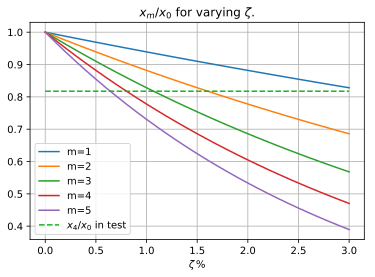

In [25]:
z = np.linspace(0,0.03,31)
for n in range(1,6):
    plt.plot(z*100, np.exp(-z*n*2*np.pi/np.sqrt(1-z*z)), label='m=%d'%n)
plt.plot(z*100, z**0*x4/x0, '--', color='xkcd:green', label='$x_4/x_0$ in test')
plt.grid()
plt.legend()
plt.xlabel('$\zeta\,\%$')
plt.title(r'$x_m/x_0$ for varying $\zeta$.')
None

# Vibration Isolation & Numerical Integration

## Data, TR

In [48]:
m = 18E3; P0 = 1E3; t0 = 6; w0 = 2*np.pi*10; Pmax = 300
z00 = 0.00; z01 = 0.01; z12 = 0.12
TR = Pmax/P0

## Plot the phase,
the angular velocity, the angular acceleration and the unbalanced load.

In the graph of the angular velocity I have put in evidence the natural frequency of vibration of an undamped suspension system (dashed line), a horizontal band of angular velocities around such frequency (in red) that are expected to excite the system in near-resonance and a vertical band (in blue) that highlights the time interval in which this near-resonance excitation is expected to take place.

The same vertical band is drawn on the plot of the unbalanced load and, especially, will be drawn on the plots of the transmitted force, to highlight the dynamic amplification of the response corresponding to a load that is just a fraction of the steady state load.

In [49]:
t = np.linspace(0,8,1001)
a = t/t0
phi0 = w0*t0*np.where(t<t0, a**2*(1-a/3), a-1/3)
phi1 = w0*np.where(t<t0, 2*a-a*a, 1)
phi2 = w0*np.where(t<t0, 2-2*a, 0)/t0
P = P0*(phi1**2*np.sin(phi0)-phi2*np.cos(phi0))/w0**2

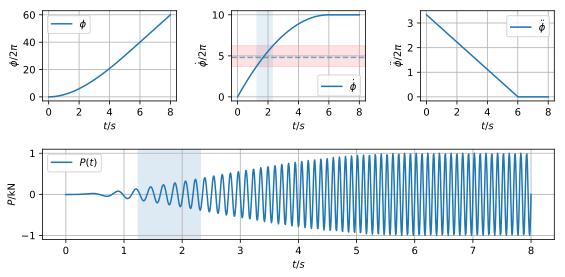

In [50]:
B200 = (1+TR)/TR
k00 = m * w0**2 / B200
wn2 = k00/m
wn = np.sqrt(wn2)
fn = wn/2/np.pi
flow = fn/1.3
fhig = fn*1.3
# 20 a - 10 a*a = f → 10 a*a -20 a + f = 0
#                   → a = 1 - sqrt(100-10f)/10 → t = t0*a
tlow = t0*(1-np.sqrt(100-10*flow)/10)
thig = t0*(1-np.sqrt(100-10*fhig)/10)

fig = plt.figure(figsize=(8,4))
axes = [plt.subplot2grid((2,3),(0,n)) for n in (0,1,2)]
for extra, ax, f, label in zip((0,1,0),
                               axes,
                              (phi0,phi1,phi2),
                              ('$\phi$', '$\dot\phi$', '$\ddot\phi$')):
    ax.plot(t, f/2/np.pi, label=label)
    ax.xaxis.set_major_locator(plt.MultipleLocator(2))
    ax.set_xlabel('$t/s$')
    ax.set_ylabel(label[:-1]+r'/2\pi$')
    ax.legend()
    ax.grid()
    if extra:
        ax.axhline(y=fn, alpha=0.6, linestyle='--')
        ax.axhspan(flow, fhig, alpha=0.12, color='red')
        ax.axvspan(tlow, thig, alpha=0.12)
ax =  plt.subplot2grid((2,3),(1,0), colspan=3)
ax.plot(t, P/1000, label='$P(t)$')
ax.legend()
ax.grid()
ax.axvspan(tlow, thig, alpha=0.15)
ax.set_xlabel('$t/s$')
ax.set_ylabel('$P$/kN')
fig.tight_layout()
None

## Design the Suspension System
for the two different values of the damping ratio $\zeta$ defined at the beginning of this section.

From $$\frac{\sqrt{1+(2\zeta\beta)^2}}{\sqrt{(1-\beta^2)^2+(2\zeta\beta)^2}}=\mathrm{TR}$$ we have
$$ \mathrm{TR}^2((1-\beta^2)^2+(2\zeta\beta)^2)-1-(2\zeta\beta)^2=0$$
that, expanded, is 
$$\mathrm{TR}^2 \beta^4 + ((4 \zeta^2 - 2) \mathrm{TR}^2 - 4 \zeta^2)\beta^2 + \mathrm{TR}^2 - 1=0.$$
Substituting $\mathrm{TR}=0.3$ and rearranging we have
$$9 \beta^4 - (364 z^2 + 18)\beta^2 - 91 = 0$$
whose positive root is 
$$ \beta^2 = \frac{364 \zeta^2 + \sqrt{(364 \zeta^2 + 18)^2 + 3276}}{18} + 1.$$


In [51]:
B201 = (364*z01**2 + np.sqrt((364*z01**2 + 18)**2 + 3276)) / 18 + 1
k01 = m * w0**2 / B201
c01 = 2*z01*np.sqrt(m*k01)

B212 = (364*z12**2 + np.sqrt((364*z12**2 + 18)**2 + 3276)) / 18 + 1
k12 = m * w0**2 / B212
c12 = 2*z12*np.sqrt(m*k12)

In [52]:
print('            mass [kg]  damper [kN·s/m]    spring [MN/m]')
for z_, k_, c_ in ((z00,k00,0), (z01,k01,c01), (z12,k12,c12)):
    print('z= %4.1f%%'%(z_*100),'     '.join('%12.3f'%x for x in (m,c_/1E3,k_/1E6)))

            mass [kg]  damper [kN·s/m]    spring [MN/m]
z=  0.0%    18000.000            0.000           16.399
z=  1.0%    18000.000           10.863           16.389
z= 12.0%    18000.000          124.896           15.045


## Numerical Integration
### A function factory

In [53]:
def new_integrator(m,c,k,h):
    c0 = 3*c + 6*m/h
    m0 = 3*m + c*h/2
    k0 = k + 3*c/h + 6*m/h/h
    def integrator(x0, v0, p0, p1):
        a0 = (p0-c*v0-k*x0)/m
        dp = p1 - p0 + a0*m0 + v0*c0
        dx = dp/k0
        dv = 3*(dx/h-v0)-a0*h/2
        return x0+dx, v0+dv
    return integrator

### Compute the response for $\zeta=1\,\%$

In [54]:
# Instantiate an integrator
next_xv = new_integrator(m, c01, k01, 8/1000)
# Set the initial conditions, x0 = 0, v0 = 0
R01 = [(0, 0)]
for p0, p1 in zip(P, P[1:]):
    R01.append(next_xv(*R01[-1], p0, p1))

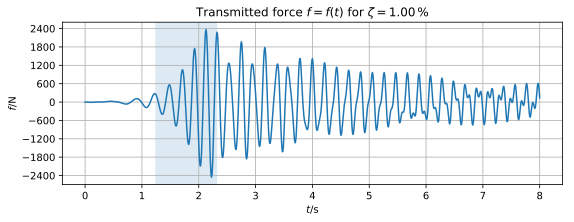

In [55]:
R01 = np.array(R01)
plt.figure(figsize=(9,3))
plt.plot(t,k01*R01[:,0]+c01*R01[:,1])
plt.grid()
plt.xlabel('$t$/s')
plt.ylabel('$f$/N')
plt.axvspan(tlow, thig, alpha=0.15)
plt.title(r'Transmitted force $f=f(t)$ for $\zeta=%.2f\,\%%$'%(z01*100))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(600));

Notice how much the transmitted force has been amplified during the near-resonance interval,
notice also that the response, well after this interval, has still a dominant frequency component
corresponding to the natural frequency of vibration of the suspended mass, that superposed
to the steady-state component of the response leads to a large value of the transmitted force.

### Compute the response for $\zeta=12\,\%$

In [56]:
next_xv = new_integrator(m, c12, k12, 8/1000)
R12 = [(0, 0)]
for p0, p1 in zip(P, P[1:]):
    R12.append(next_xv(*R12[-1], p0, p1))

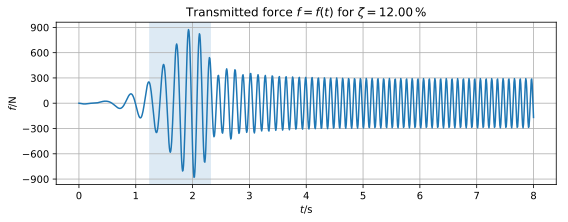

In [57]:
R12 = np.array(R12)
plt.figure(figsize=(9,3))
plt.plot(t,k12*R12[:,0]+c12*R12[:,1])
plt.grid()
plt.xlabel('$t$/s')
plt.ylabel('$f$/N')
plt.axvspan(tlow, thig, alpha=0.15)
plt.title(r'Transmitted force $f=f(t)$ for $\zeta=%.2f\,\%%$'%(z12*100))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(300));

With a largish value of the damping ratio we have a controlled response during the near-resonant excitation interval and the transient response is quickly damped out, leading in a short time to a transmitted force that has exactly (numerical integration works, doesn't it?) the target amplitude of $300\,{}$N.

# Initialization Cells

In [38]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg'] 

In [39]:
import numpy as np
import sympy as sp

import matplotlib.pyplot as plt
from matplotlib import rc_context

from IPython.display import Math, Latex

sp.init_printing(use_latex=True)

In [40]:
%%html 
<style>
div.prompt{display:none}
h1 {
    color: #ffffff!important;
    background-color: #606090;
    text-align:center;
    margin-top: 2cm;
    margin-bottom: 1cm;
    padding: 15px;
    font-size: x-large!important ;
}
</style>